# DTree Classifer Demonstration

In this tutorial we will demonstrate how to use the `DecisionTreeClassifer` class in `scikit-learn` to perform classifications predictions. 


## 1.0 Setup
Import modules


In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


np.random.seed(1)

## 2.0 Load data

In [32]:
X_train = pd.read_csv('./data/airbnb_train_X_price_gte_150.csv') 
y_train = pd.read_csv('./data/airbnb_train_y_price_gte_150.csv') 
X_test = pd.read_csv('./data/airbnb_test_X_price_gte_150.csv') 
y_test = pd.read_csv('./data/airbnb_test_y_price_gte_150.csv') 

In [33]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

## 3.0 Model the data

Conduct an initial random search across a wide range of possible parameters.

In [34]:
Dtree = DecisionTreeClassifier(max_depth=3,min_samples_leaf=5).fit(X_train, np.ravel(y_train))

In [35]:
model_preds = Dtree.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"DTree_basic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,DTree_basic,0.839738,0.820285,0.868173,0.84355


## Random Dtree search

In [36]:
score_measure = "accuracy"
kfolds = 5

param_grid = {
    'min_samples_split': [1,10,50,100,200],  
    'min_samples_leaf': [1,5,10,20,50],
    'min_impurity_decrease': [0.0001, 0.0005, 0.0010, 0.0020, 0.0050],
    'max_leaf_nodes': [10,25,50,100,200], 
    'max_depth': [5,10,20,30], 
    'criterion': ['entropy', 'gini'],
}

dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)
print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestRecallTree = rand_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
The best accuracy score is 0.8593213901885207
... with parameters: {'min_samples_split': 50, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 30, 'criterion': 'gini'}


c:\Users\mukes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
110 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mukes\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mukes\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\Users\mukes\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in 

In [37]:
model_preds = rand_search.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"DTree_random_search", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,DTree_basic,0.839738,0.820285,0.868173,0.84355
0,DTree_random_search,0.846298,0.837937,0.856874,0.84730


### diagram

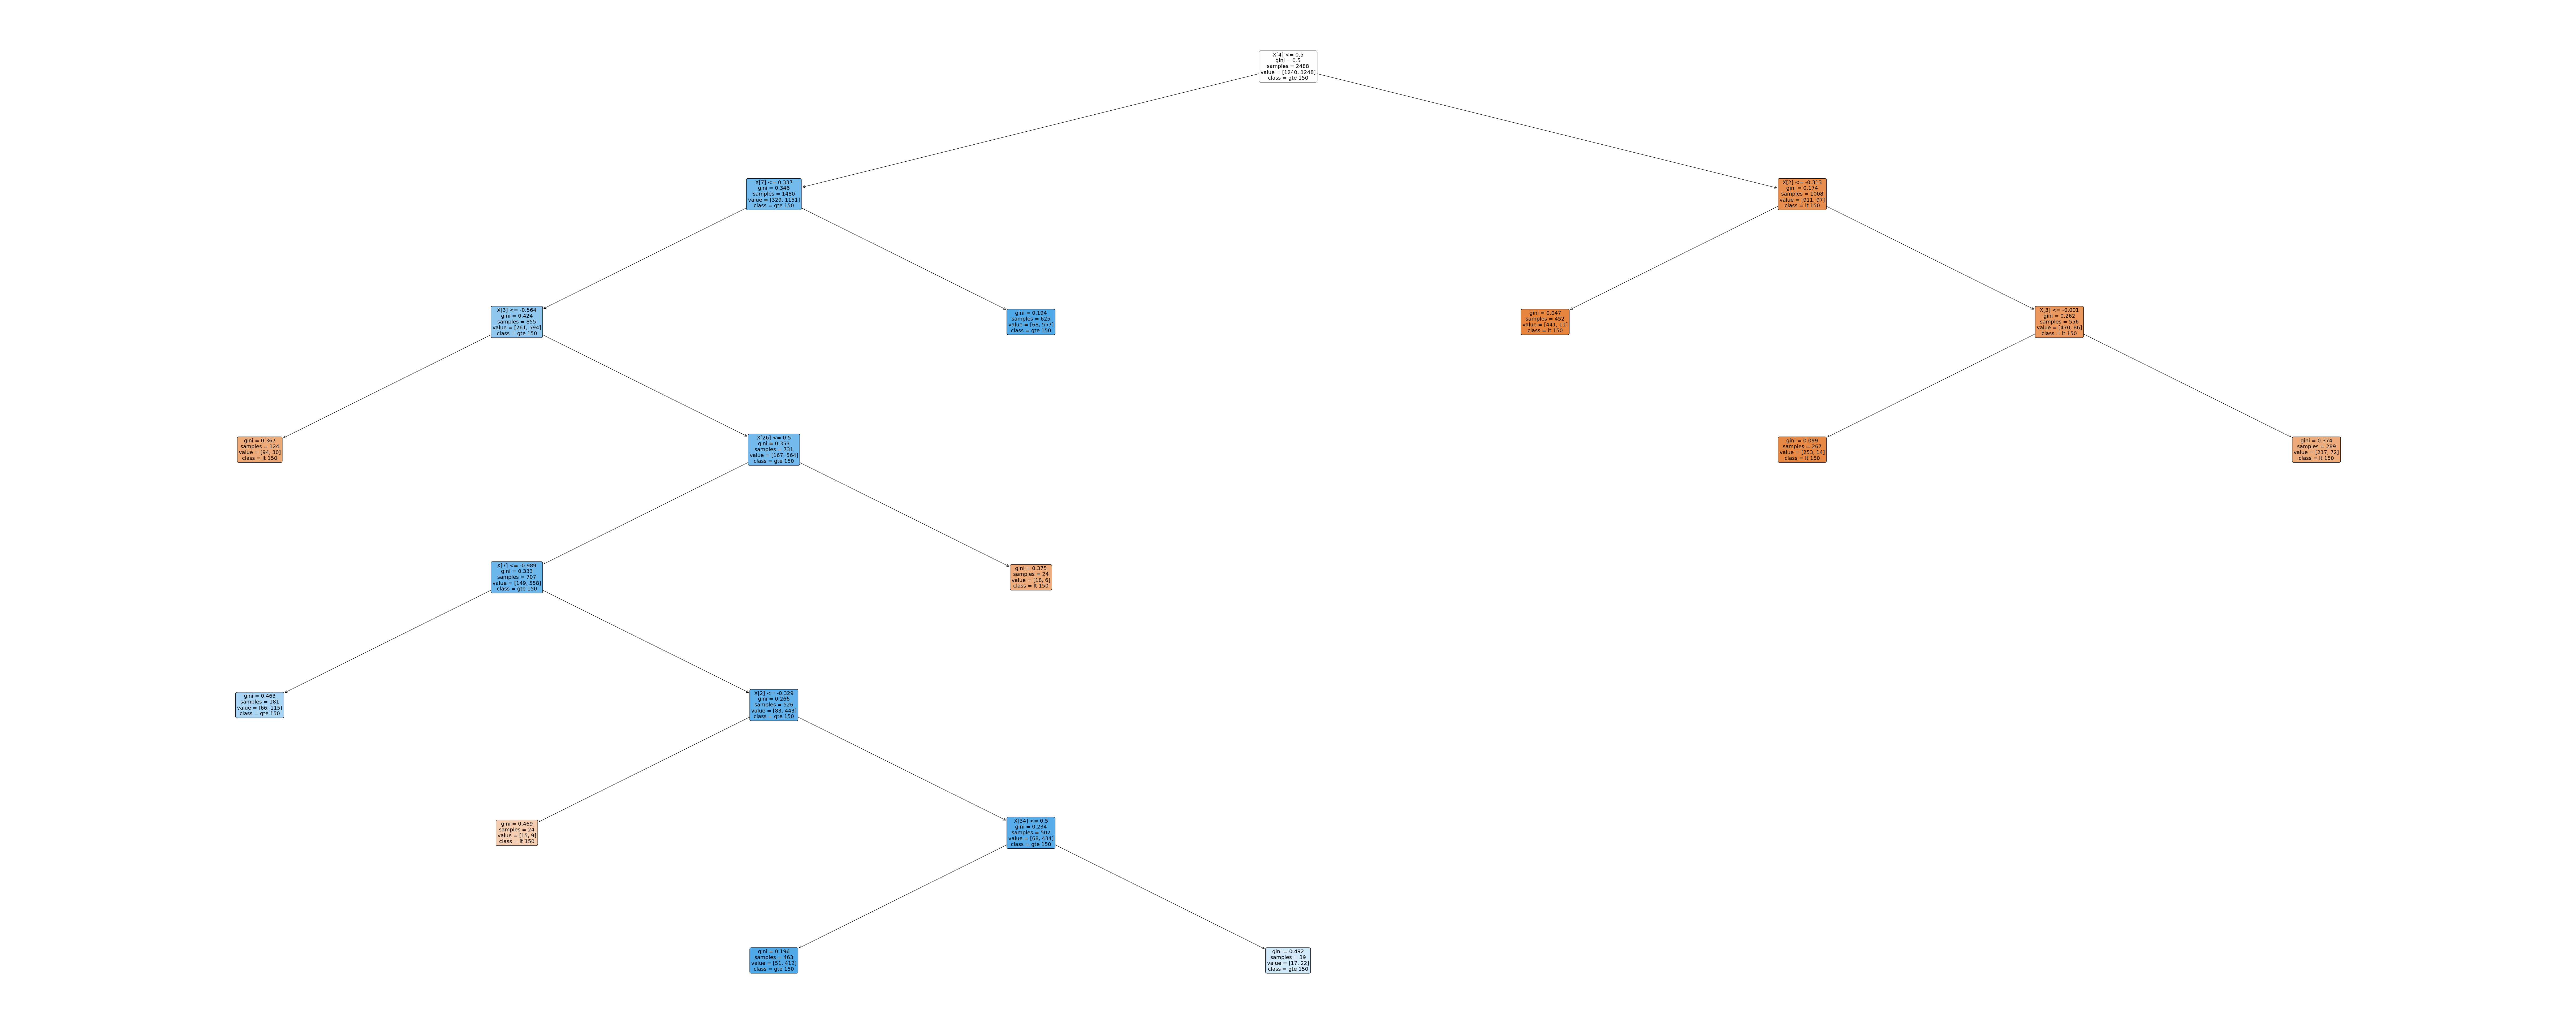

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(125,50))
tree = plot_tree(rand_search.best_estimator_, 
              #feature_names=train_inputs.columns.values, # our feature names are stripped from the data set
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

## Importance of features


In [39]:
np.round(rand_search.best_estimator_.feature_importances_,2)

array([0.  , 0.  , 0.03, 0.1 , 0.79, 0.  , 0.  , 0.06, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

## DTree Grid search

In [40]:
score_measure = "accuracy"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(30,36),  
    'min_samples_leaf': np.arange(6,12),
    'min_impurity_decrease': np.arange(0.0048, 0.0054, 0.0001),
    'max_leaf_nodes': np.arange(162,168), 
    'max_depth': np.arange(15,21), 
    'criterion': ['entropy'],
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 9072 candidates, totalling 45360 fits
The best accuracy score is 0.8593221982497395
... with parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_leaf_nodes': 162, 'min_impurity_decrease': 0.0048, 'min_samples_leaf': 8, 'min_samples_split': 30}


In [41]:
model_preds = grid_search.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"DTree_Grid_search", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,DTree_basic,0.839738,0.820285,0.868173,0.84355
0,DTree_random_search,0.846298,0.837937,0.856874,0.84730
0,DTree_Grid_search,0.846298,0.837937,0.856874,0.84730


## Importance of features

In [42]:
np.round(grid_search.best_estimator_.feature_importances_,2)

array([0.  , 0.  , 0.06, 0.1 , 0.71, 0.01, 0.02, 0.07, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

Diagrams of DTree 

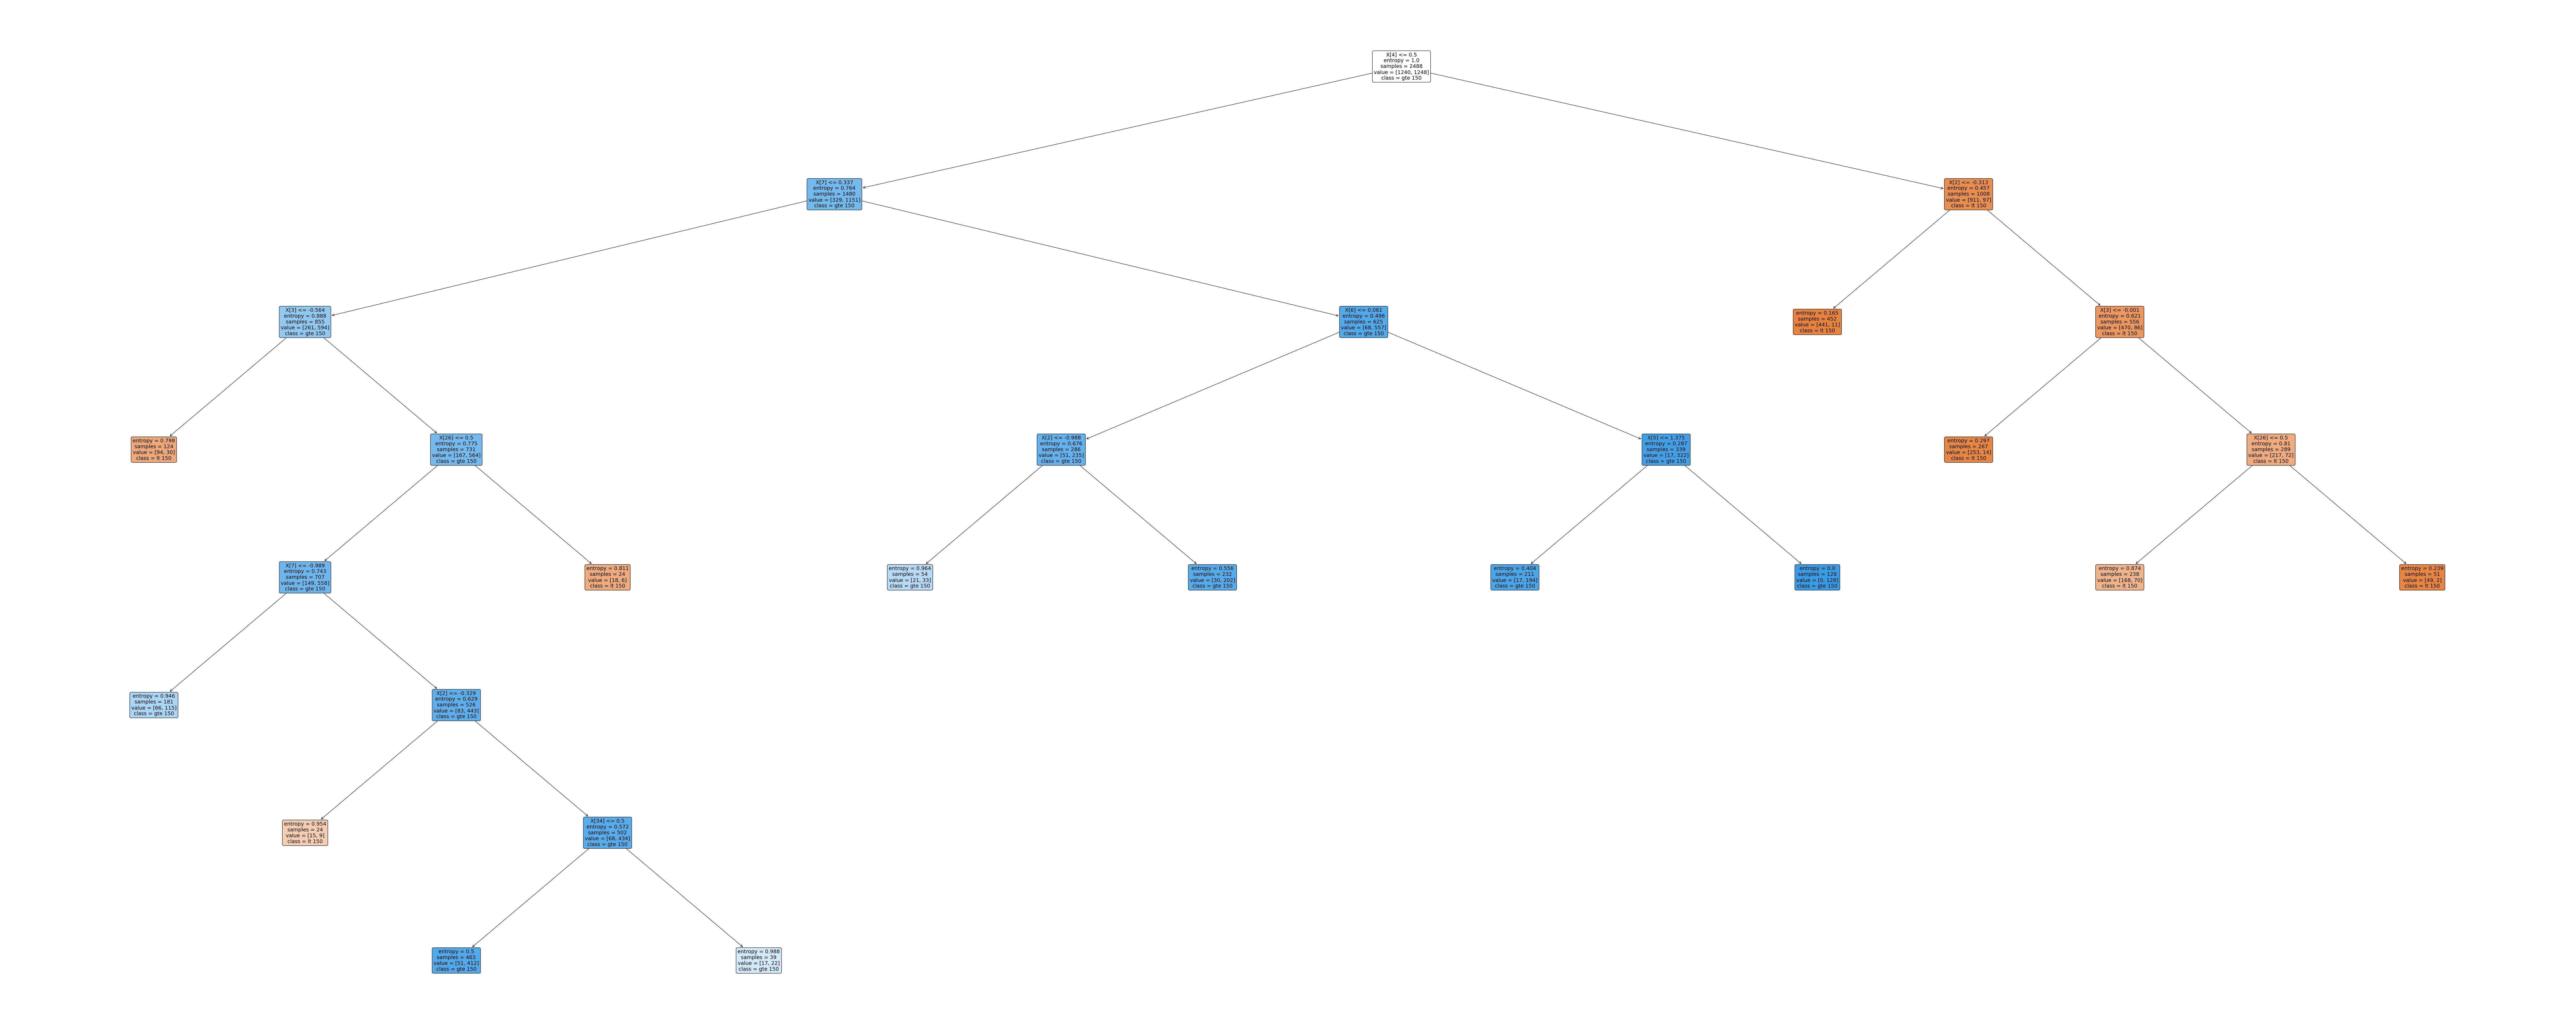

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(125,50))
tree = plot_tree(grid_search.best_estimator_, 
              #feature_names=train_inputs.columns.values, # our feature names are stripped from the data set
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [44]:
performance

,model,Accuracy,Precision,Recall,F1
0,DTree_basic,0.839738,0.820285,0.868173,0.84355
0,DTree_random_search,0.846298,0.837937,0.856874,0.84730
0,DTree_Grid_search,0.846298,0.837937,0.856874,0.84730


In [45]:
performance.sort_values(by='Accuracy')

,model,Accuracy,Precision,Recall,F1
0,DTree_basic,0.839738,0.820285,0.868173,0.84355
0,DTree_random_search,0.846298,0.837937,0.856874,0.84730
0,DTree_Grid_search,0.846298,0.837937,0.856874,0.84730
